In [1]:
from lib.ekyn import *
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

snezana_mice_ids = get_snezana_mice_ids()
ekyn_ids = get_ekyn_ids()

In [ ]:
n_samples = 0
for id in snezana_mice_ids:
    X,y = load_snezana_mice_pt(id)
    n_samples += len(X)
n_seconds = n_samples * 10
n_hours = n_seconds / 3600
print(f'{n_hours} hours')

In [ ]:
n_samples = len(ekyn_ids) * 17280
n_seconds = n_samples * 10
n_hours = n_seconds / 3600
print(f'{n_hours} hours')

21-HET-1
21-HET-10
21-HET-11
21-HET-12
21-HET-13
21-HET-2
21-HET-3
21-HET-4
21-HET-5
21-HET-7
A1-0
A1-1
A4-0
B1-0
B3-1
C1-0
C4-0
C4-1
D1-0
E1-0


(0.0, 2.0)

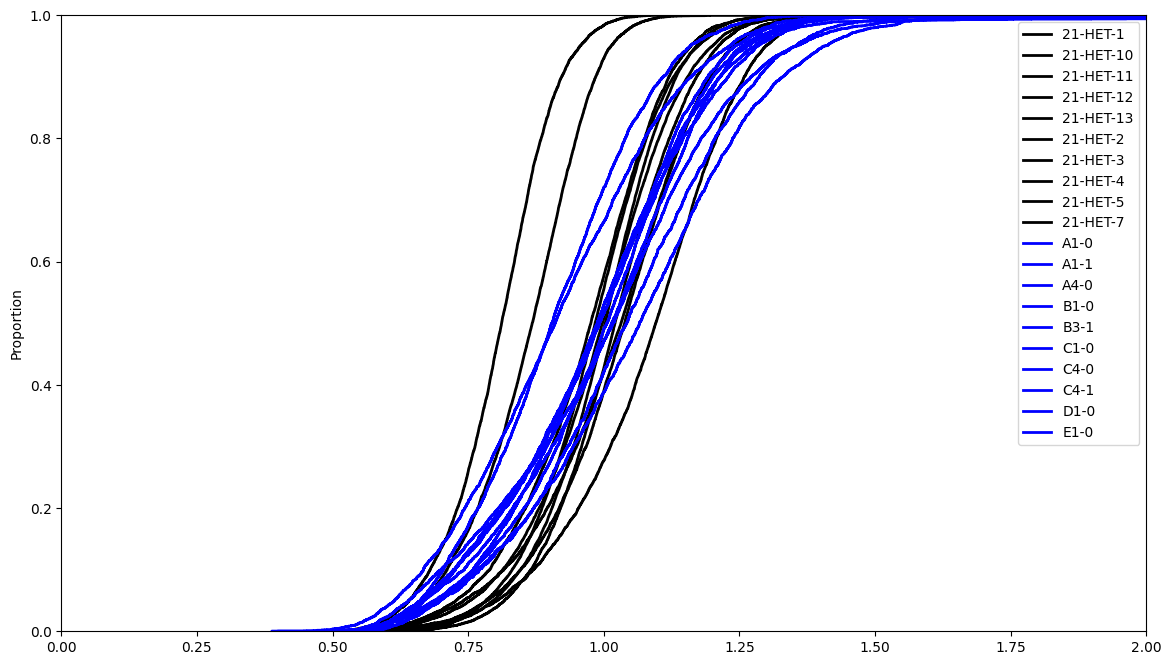

In [15]:
df = pd.DataFrame()

plt.figure(figsize=(14,8))
for id in snezana_mice_ids[:10]:
    print(id)
    X,y = load_snezana_mice_pt_robust(id=id)
    std,mean = torch.std_mean(X[torch.where(y.argmax(axis=1) == 1)[0]]
,dim=1)
    sns.ecdfplot(std,linewidth=2,label=id,color='black')

for id in ekyn_ids[:10]:
    print(id)
    X,y = load_ekyn_pt_robust(id=id,condition='Vehicle')
    std,mean = torch.std_mean(X[torch.where(y.argmax(axis=1) == 1)[0]]
,dim=1)
    sns.ecdfplot(std,linewidth=2,label=id,color='blue')

# df_long = df.melt()
# df_long[['id','condition']] = df_long.variable.str.split('_',expand=True)
# sns.ecdfplot(df_long[df_long.condition == 'Vehicle'],x='value',hue='id',linestyle='-')
# sns.ecdfplot(df_long[df_long.condition == 'PF'],x='value',hue='id',linestyle='--')
# std,mean = torch.std_mean(eeg,dim=1)

plt.legend()
plt.xlim([0,2])

In [ ]:
X.shape

In [ ]:
df = pd.DataFrame()

plt.figure(figsize=(14,8))
for id in idx:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt(idx=id,condition=condition)
        std,mean = torch.std_mean(X,dim=1)
        df[f'{id}_{condition}'] = std
df_long = df.melt()
df_long[['id','condition']] = df_long.variable.str.split('_',expand=True)
sns.ecdfplot(df_long[df_long.condition == 'Vehicle'],x='value',hue='id',linestyle='-')
sns.ecdfplot(df_long[df_long.condition == 'PF'],x='value',hue='id',linestyle='--')
std,mean = torch.std_mean(eeg,dim=1)
sns.ecdfplot(std,linewidth=2)


plt.xlim([0,.0002])

In [ ]:
idx = get_ekyn_ids()
# train_idx,test_idx = train_test_split(get_ekyn_ids(),test_size=.25,random_state=0)
train_idx = get_ekyn_ids()
test_idx = [train_idx[12]]
train_idx.remove(test_idx[0])
print(train_idx,test_idx)
print(len(train_idx),len(test_idx))

In [ ]:
df = pd.DataFrame()

for id in idx:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt(idx=id,condition=condition)
        df[f'{id}_{condition}'] = torch.bincount(y.argmax(axis=1))/len(y)

In [ ]:
df = df.T

In [ ]:
plt.figure(figsize=(7.2,7.2),dpi=200)
sns.boxplot(data=df)

In [ ]:
s = df.describe()[1]
w = df.describe()[2]
iqr_s = s['75%'] - s['25%']
iqr_w = w['75%'] - w['25%']
lower_outlier_s = s['25%'] - (1.5*iqr_s)
upper_outlier_w = w['75%'] + (1.5*iqr_w)
lower_outlier_s

In [ ]:
df[(df[1] < lower_outlier_s) | (df[2] > upper_outlier_w)]

In [ ]:
from mne.io import read_raw_edf

eeg = torch.from_numpy(read_raw_edf(f'./24-AGING-2.edf').get_data(picks=['EEG 1'])[0]).float().reshape(-1,5000)

In [ ]:
df = pd.DataFrame()

plt.figure(figsize=(14,8))
for id in idx:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt(idx=id,condition=condition)
        std,mean = torch.std_mean(X,dim=1)
        df[f'{id}_{condition}'] = std
df_long = df.melt()
df_long[['id','condition']] = df_long.variable.str.split('_',expand=True)
sns.ecdfplot(df_long[df_long.condition == 'Vehicle'],x='value',hue='id',linestyle='-')
sns.ecdfplot(df_long[df_long.condition == 'PF'],x='value',hue='id',linestyle='--')
std,mean = torch.std_mean(eeg,dim=1)
sns.ecdfplot(std,linewidth=2)


plt.xlim([0,.0002])